In [6]:
import time as time
import numpy as np
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_swiss_roll

%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>


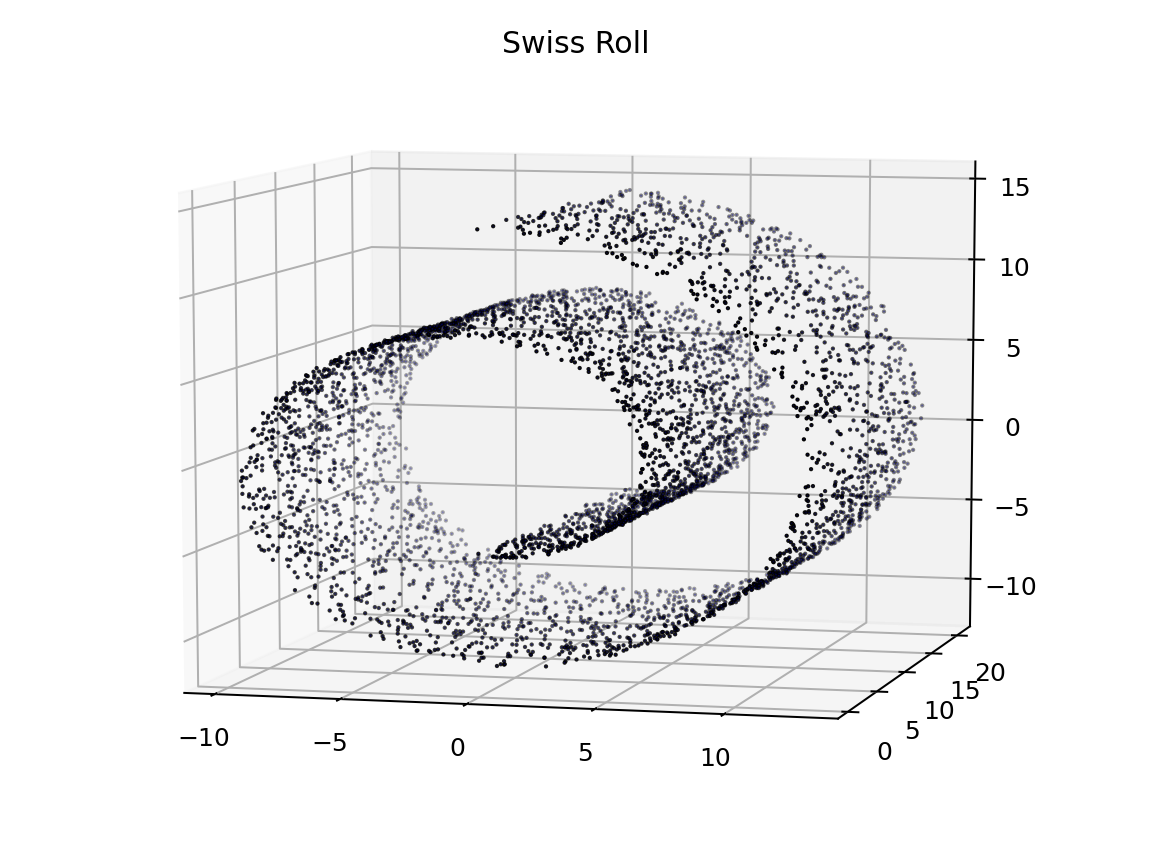

Text(0.5, 0.92, 'Swiss Roll')

In [5]:
n_samples = 5000
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise)

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], color='blue', s=.5, edgecolor='k')
ax.set_title("Swiss Roll")

In [ ]:
# train bijective transformation
from agents.lsp_hierarchical_rl.model import BijectiveTransform
import torch
from torch.optim import Adam
from tqdm import tqdm

f = BijectiveTransform(3, 6, scale_net_hidden_layer_num=2, scale_net_hidden_layer_size=256, 
    translate_net_hidden_layer_num=2, translate_net_hidden_layer_size=256, condition_vector_size=0)
optim = Adam(f.parameters())


TRAIN_EPOCHS = 50001
BATCH_SIZE = 256
pbar = tqdm(range(TRAIN_EPOCHS))
for epoch in pbar:
    X, _ = make_swiss_roll(BATCH_SIZE, noise)

    ll = f.calc_log_likelihood(torch.FloatTensor(X))
    optim.zero_grad()
    (-ll).backward()
    optim.step()

    if epoch % 1000 == 0:
        print("EPOCH {} --- Log-likelihood {:.2f}".format(epoch, ll.item()))


  0%|          | 4/50001 [00:00<1:25:46,  9.72it/s]

EPOCH 0 --- Log-likelihood -1395.30


  1%|          | 539/50001 [00:21<37:09, 22.19it/s] 

Swiss Roll -> Multivariate Normal


<IPython.core.display.Javascript object>


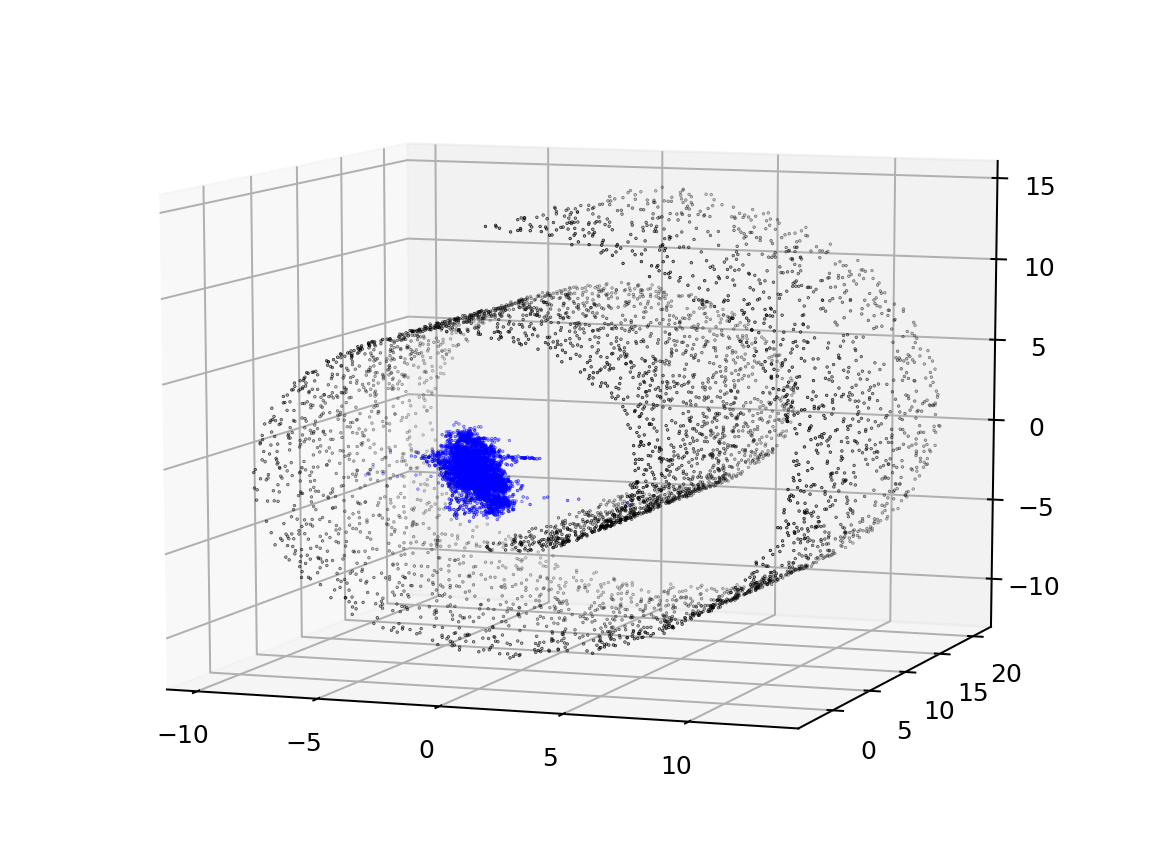

Multivariate Normal -> Swiss Roll


<IPython.core.display.Javascript object>


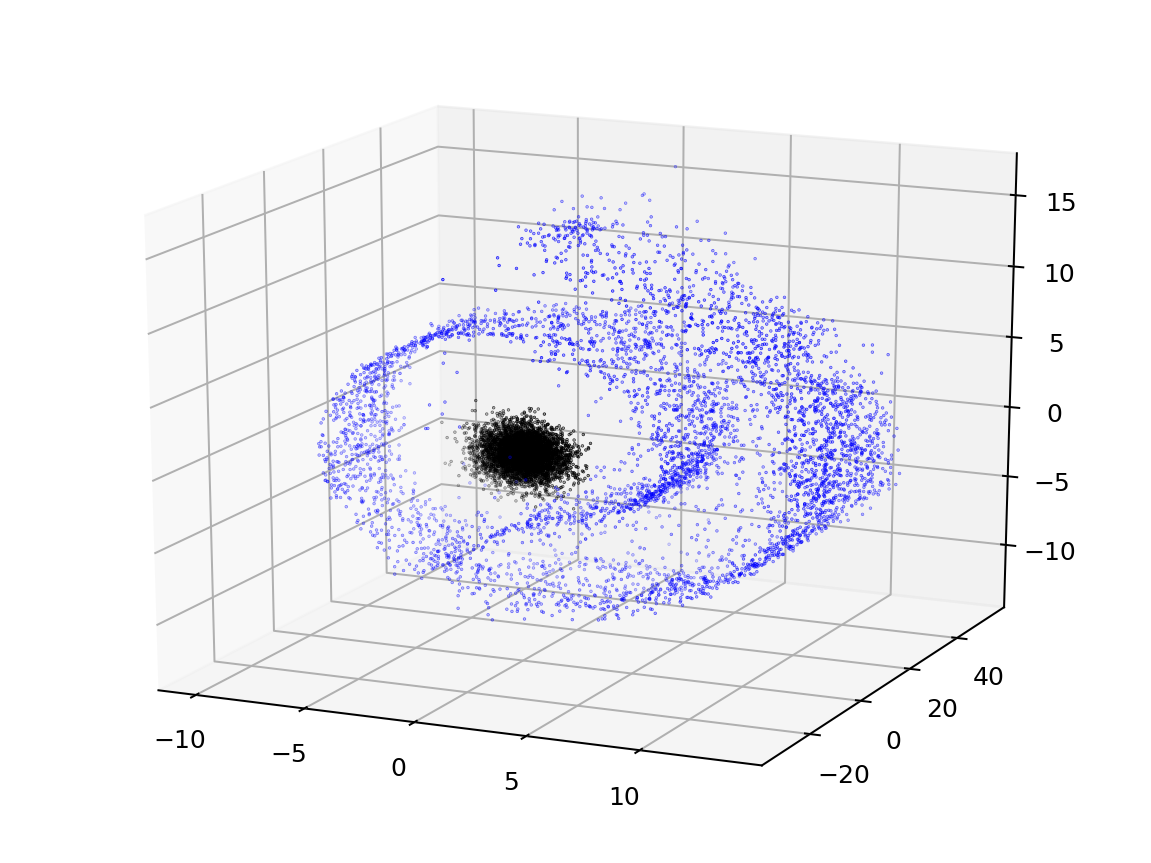

In [13]:
DATASIZE = 5000
noise = 0.05

print("Swiss Roll -> Multivariate Normal")
X, _ = make_swiss_roll(DATASIZE, noise)
Z, _ = f.infer(torch.FloatTensor(X))
Z = Z.detach().numpy()

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], color='black', s=.1)
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], color='blue', s=.1)


print("Multivariate Normal -> Swiss Roll")
m_norm = torch.distributions.MultivariateNormal(torch.zeros(3), torch.eye(3))
Z_ = m_norm.sample((DATASIZE, ))
X_, _ = f.generate(torch.FloatTensor(Z_))
X_ = X_.detach().numpy()

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
ax.scatter(Z_[:, 0], Z_[:, 1], Z_[:, 2], color='black', s=.1)
ax.scatter(X_[:, 0], X_[:, 1], X_[:, 2], color='blue', s=.1)

